In [790]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [791]:
#Loading the data
df_heart=pd.read_csv('C:/Users/Admin/Desktop/Saiprakash/DT/heart_disease.csv')
df_heart

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [792]:
#Checking for shape of the dataset(ie.,number of rows and columns of the dataset.)
df_heart.shape

(199, 14)

There are 199 rows and 14 columns present in this dataset

In [793]:
#Checking the columns
df_heart.columns

Index(['63', '1', '4', '140', '260', '0', '1.1', '112', '1.2', '3', '2', '?',
       '?.1', '2.1'],
      dtype='object')

Given,the dataset attributes refers the following attribute names :
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Let's rename the above column names such as 3 with age,4 with sex ....upto 58 with num

In [794]:
#The given column names are not understandable
df_heart.rename(columns={'63':'age', '1':'sex', '4':'cp', '140':'trestbps', '260':'chol', '0':'fbs', '1.1':'restecg', '112':'thalach', '1.2':'exang', '3':'oldpeak', '2':'slope', '?':'ca',
       '?.1':'thal', '2.1':'num'},inplace = True)

In [795]:
#Checking the renamed columns 
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

This the complete description of each column in the dataset:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

==> Value 1: typical angina

==> Value 2: atypical angina

== Value 3: non-anginal pain

==> Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

==> Value 0: normal

==> Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

==> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

==> Value 1: upsloping

==> Value 2: flat

==> Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

num: diagnosis of heart disease (angiographic disease status)

==> Value 0:  absence

==> Value 1 to 4 :  distinguish presence

In [796]:
# As our target variable is the last column "num" let's rename that column with "target" for better understanding
df_heart.rename(columns={'num':'target'},inplace= True)

In [797]:
#Checking the renamed columns 
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [798]:
#Checking the data types of each column
df_heart.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

5 columns are of int type and  9 of them are object type

In [799]:
#Checking the information of the dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       199 non-null    int64 
 1   sex       199 non-null    int64 
 2   cp        199 non-null    int64 
 3   trestbps  199 non-null    object
 4   chol      199 non-null    object
 5   fbs       199 non-null    object
 6   restecg   199 non-null    int64 
 7   thalach   199 non-null    object
 8   exang     199 non-null    object
 9   oldpeak   199 non-null    object
 10  slope     199 non-null    object
 11  ca        199 non-null    object
 12  thal      199 non-null    object
 13  target    199 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 21.9+ KB


Observations from the information of the dataset includes :

==> There are 199 rows and 14 columns in the dataset.


==> There are no missing values in the dataset.

In [800]:
#head returns the first 5 rows 
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


From the above head methd it is clear that column num changed to target successfully.

In [801]:
#tail returns the last 5 rows 
df_heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0
198,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [802]:
df_heart['slope'].value_counts()

?    102
2     52
3     29
1     16
Name: slope, dtype: int64

In [803]:
df_heart['ca'].value_counts()

?    197
0      2
Name: ca, dtype: int64

In [804]:
df_heart['oldpeak'].value_counts()

?       56
0       40
2       25
1.5     21
1       18
3       12
2.5      9
0.5      7
4        4
1.3      2
3.5      1
1.6      1
1.7      1
-0.5     1
0.8      1
Name: oldpeak, dtype: int64

In [805]:
df = df_heart

# Summary Statistics

In [806]:
df.describe()

,age,sex,cp,restecg,target
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,0.733668,1.517588
std,7.827080,0.171433,0.796928,0.684918,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


Observation:

==> Most of the patients age group is between 35 and 77.


==> The age column has the highest values in the whole dataset since, most of the other columns are of categorical.


==> The maximum patients are of male.


==> The difference between 75 percentile and max is more.So,outliers may present.

# Exploratory Data Analysis

In [807]:
#Checking for unique values
df['age'].unique()

array([44, 60, 55, 66, 65, 56, 59, 62, 63, 57, 46, 58, 64, 74, 52, 69, 51,
       54, 77, 61, 40, 41, 42, 53, 68, 67, 72, 75, 49, 35, 43, 48, 50, 45,
       76, 70, 71, 38, 37], dtype=int64)

In [808]:
df['target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [809]:
df['target'].value_counts()

1    56
0    51
3    42
2    40
4    10
Name: target, dtype: int64

Observations:
There are 5 levels of target namely 0,1,2,3,4 and level 1 has more patients.

# Checking for Missing Values

In [810]:
#checking for the sum of null values if any
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Observations:
    
There are no missing values in the dataset

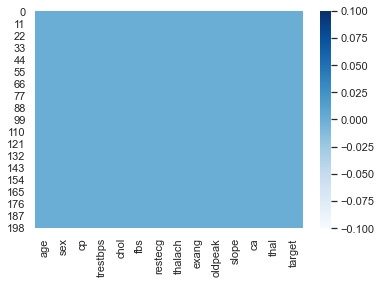

In [811]:
# Visualizing the null values using heatmap
sns.heatmap(df.isnull(),cmap = 'Blues')

From the heatmap,it is clear that there are no missing values in the dataset.

# To check the Correlation

In [812]:
df.corr()

,age,sex,cp,restecg,target
age,1.000000,0.033837,-0.039809,0.001487,0.286630
sex,0.033837,1.000000,0.037525,0.060305,0.147190
cp,-0.039809,0.037525,1.000000,0.033617,0.167202
restecg,0.001487,0.060305,0.033617,1.000000,-0.033597
target,0.286630,0.147190,0.167202,-0.033597,1.000000


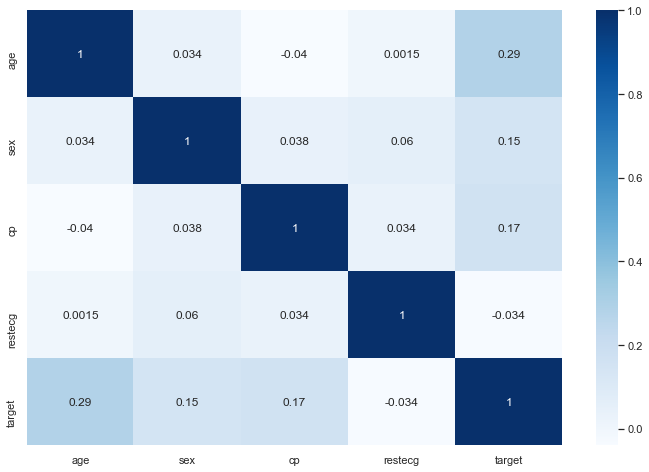

In [813]:
#visualizing correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True,cmap='Blues')

Observations:
    
    ==>oldpeak is highly correlated with exang and then exang with trestbps.
    
    ==>thalach is negatively correlated with cp.


# Data Visualization

# Univariate Analysis

In [814]:
df['target'].value_counts()

1    56
0    51
3    42
2    40
4    10
Name: target, dtype: int64

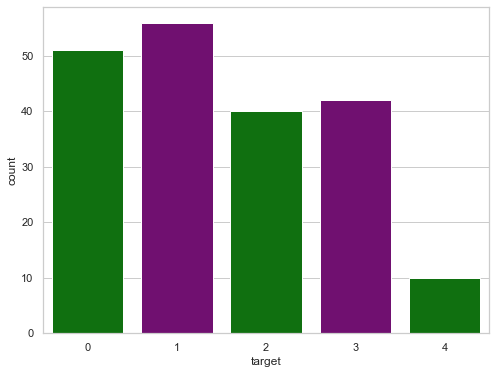

In [815]:
plt.figure(figsize=(8,6))
sns.countplot(df.target, palette = ['green', 'purple'])

Text(0.5, 1.0, 'Heart disease depending on ages')

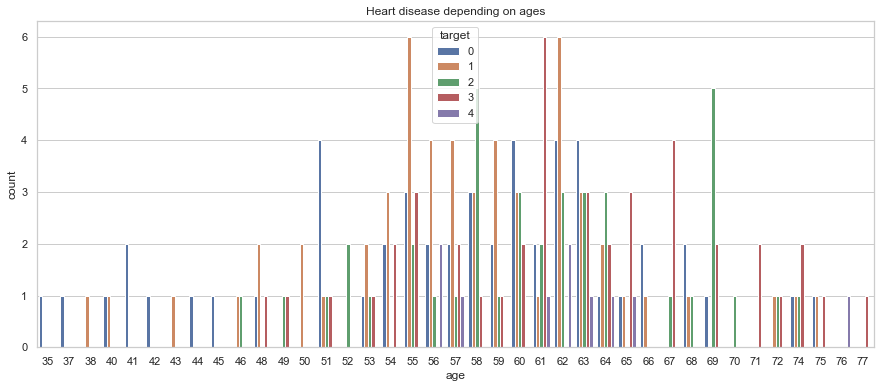

In [816]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'age', hue = 'target', data = df)
plt.title("Heart disease depending on ages")

In [817]:
df['sex'].value_counts()

1    193
0      6
Name: sex, dtype: int64

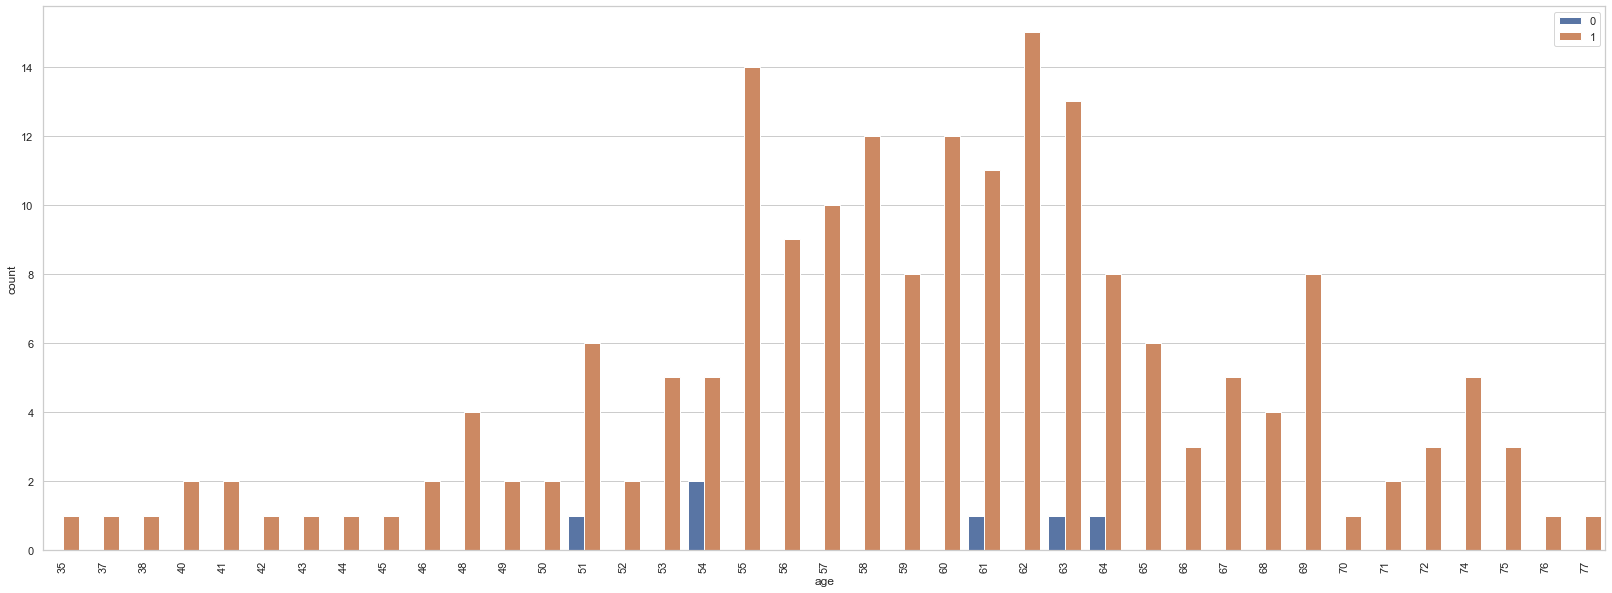

In [818]:
plt.figure(figsize=(28,10))
sns.countplot(data=df, x='age', hue='sex')
plt.legend(loc='upper right')
plt.xticks(rotation = 90);

From the count plot,it is clear that more patients are from 1 category that is male and at the of age 62 there are most male patients.

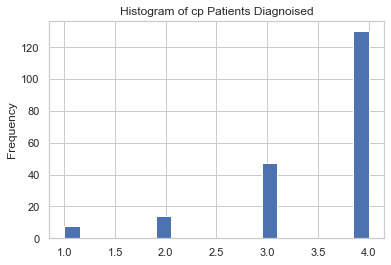

In [819]:
df['cp'].plot.hist(bins=20)
plt.title('Histogram of cp Patients Diagnoised')
plt.show()

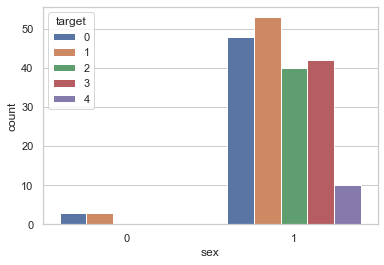

In [820]:
sns.countplot(x='sex', data=df, hue='target')

From the above count plot,target 1 are more in number and then 0 which represents no heart disease.

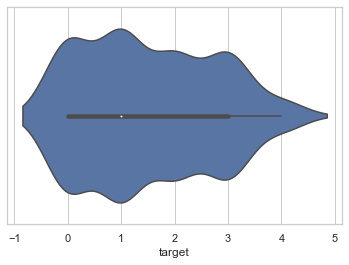

In [821]:
sns.set(style='whitegrid')
sns.violinplot(df['target'])
plt.show()

Most of the patients are of 0 or 1 level heart disease.

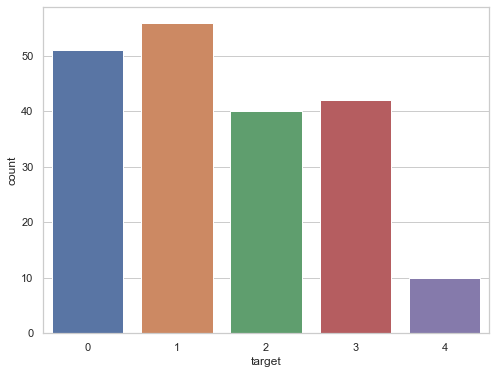

In [822]:
plt.figure(figsize=(8,6))
sns.countplot(df['target'])
plt.show()

The count plot shows that most of the patients are from level 0 or 1.

# Bivariate Analysis

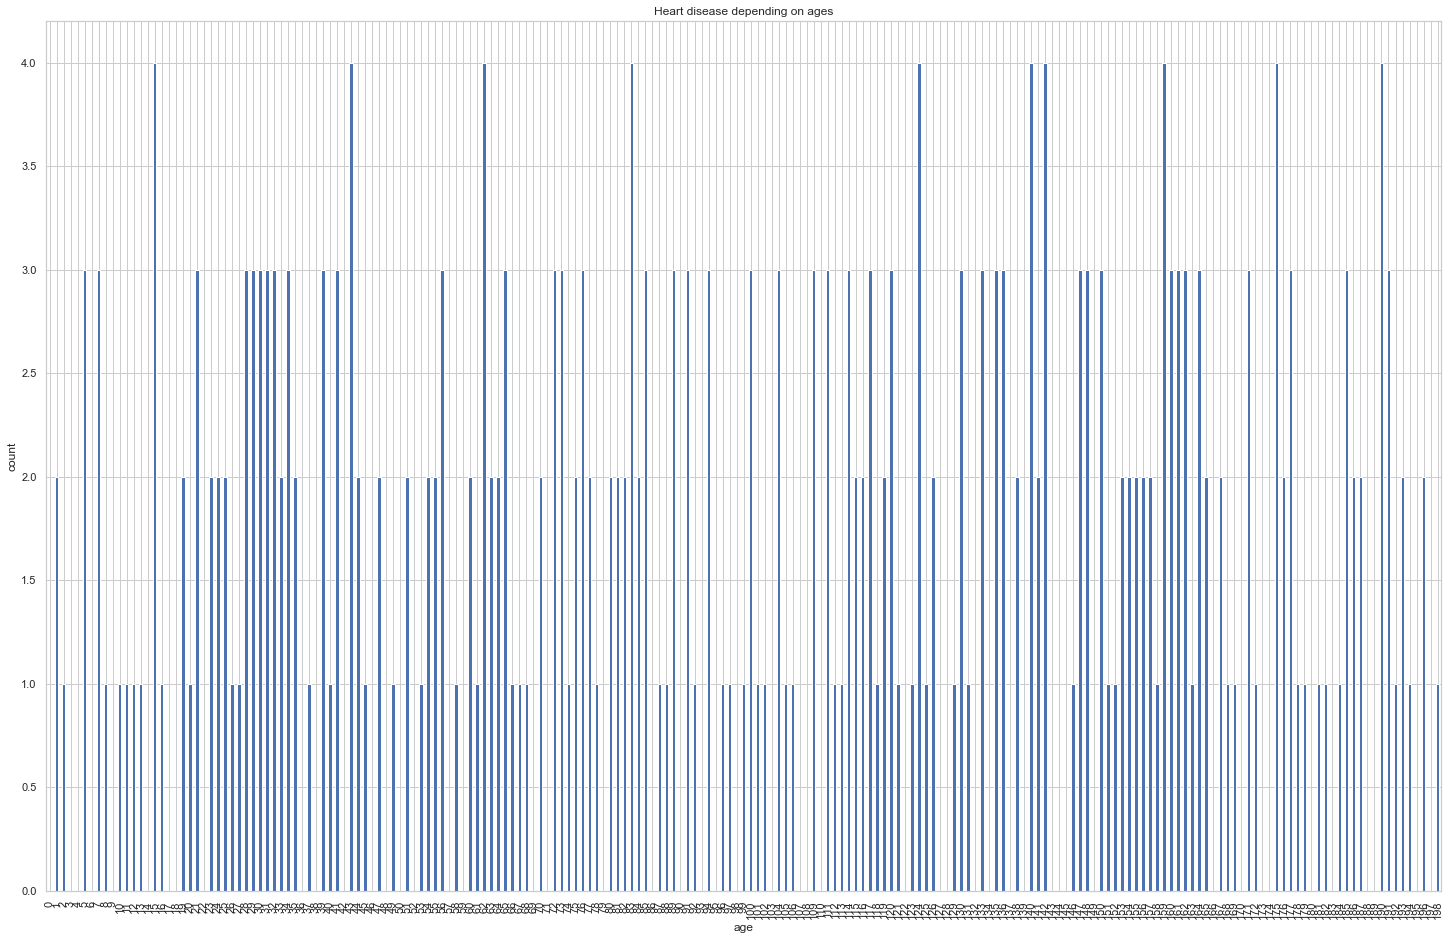

In [823]:
plt.figure(figsize=(25,16))
df['target'].plot.bar()
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.title('Heart disease depending on ages')
plt.show()

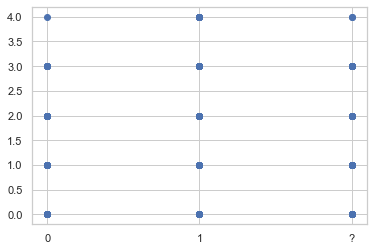

In [824]:
plt.scatter(df['exang'],df['target'])
plt.show()

All the exercise induced angina have equal levels.

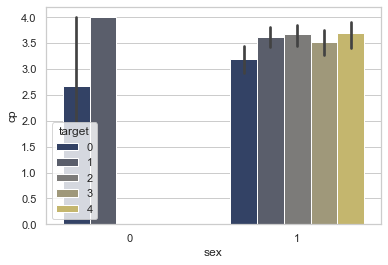

In [825]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

The target levels from 0 to 4 are male only

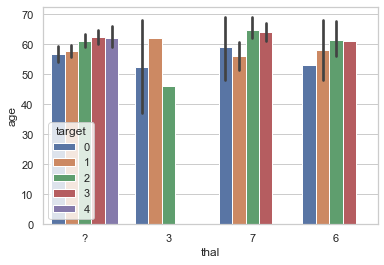

In [826]:
sns.barplot(y='age', x='thal', data=df, hue='target')

The target 4 has more thal with age over 60.

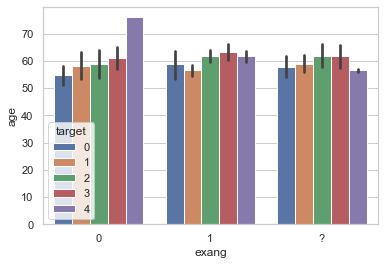

In [827]:
sns.barplot(y='age', x='exang', data=df, hue='target')

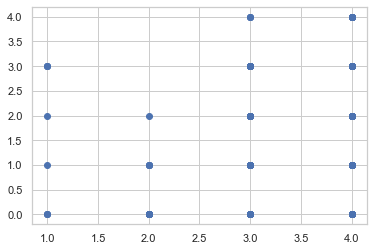

In [828]:
plt.scatter(df['cp'],df_heart['target'])
plt.show()

The target variables (3&4) have equal persons who are suffering with chest pain.

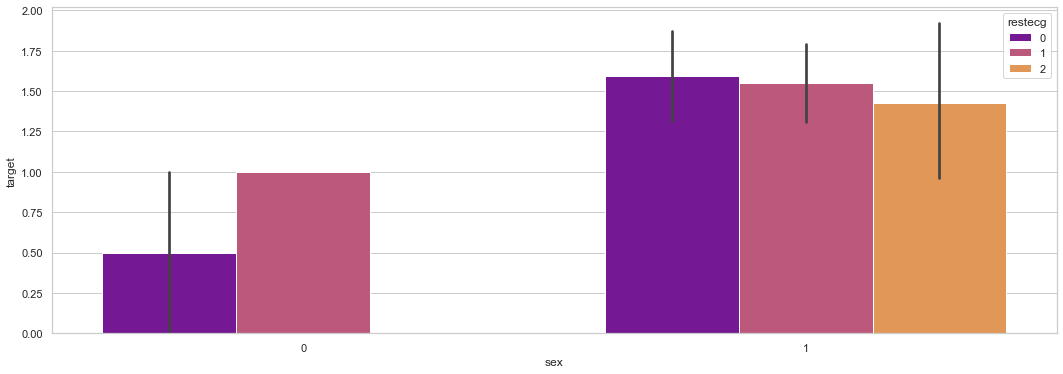

In [829]:
plt.figure(figsize=(18,6))
sns.barplot(x='sex',y='target', hue='restecg', data=df,palette='plasma' )

Male has all the three levels of resting electrocardiographic results and most of the male patients are of normal resting electrocardiographic results.

# Plotting Outliers

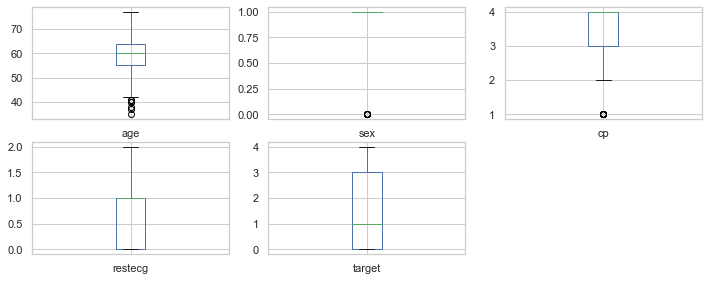

In [830]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

From the above boxplots,it is clear that outliers are present.

from sklearn.preprocessing import LabelEncoder
df= df_heart.copy()
df= df.apply(LabelEncoder().fit_transform)
df.head()

# To check the distribution of skewness

In [831]:
df.skew()

age       -0.397178
sex       -5.537073
cp        -1.641267
restecg    0.396540
target     0.302681
dtype: float64

Less skewness is present

# Removing Outliers

In [832]:
#Removing for outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age        9.0
sex        0.0
cp         1.0
restecg    1.0
target     3.0
dtype: float64


In [833]:
(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df_o = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_o

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,62,1,4,158,170,0,1,138,1,0,?,?,?,1
193,46,1,4,134,310,0,0,126,0,0,?,?,3,2
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [834]:
print(df.shape,'\t',df_o.shape)

(199, 14) 	 (178, 14)


199 rows reduced to 178.So,outliers are removed.

In [835]:
df = df_o
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,62,1,4,158,170,0,1,138,1,0,?,?,?,1
193,46,1,4,134,310,0,0,126,0,0,?,?,3,2
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


# Model Training

In [836]:
# lets change the heart disease types 1to 4 to 1
df.loc[df['target'] > 0 , 'target'] =1

# lets catergories the age into 
# 1: young age (29-40) , 
# 2: middle age (40-55) , and 
# 3: oldage(<50)
df.loc[(df.age >= 29) & (df.age < 40), 'age'] = 1
df.loc[(df.age >= 40) & (df.age < 55) , 'age'] = 2
df.loc[(df.age >= 55) , 'age'] = 3

In [837]:
from sklearn.preprocessing import LabelEncoder
df1= df.copy()
df1= df.apply(LabelEncoder().fit_transform)
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,2,13,24,0,1,21,0,1,3,1,3,0
1,1,0,2,14,31,0,1,30,1,6,2,1,3,1
2,1,0,2,20,41,0,1,34,1,10,0,1,3,1
3,1,0,1,4,27,1,2,56,1,5,1,1,3,0
4,1,0,1,7,0,0,1,14,0,0,0,1,3,0


In [838]:
df=df1

In [839]:
#Seperating into input and output variables
x = df.drop('target', axis=1)  
y = df['target']

In [840]:
#Splitting input and output variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [841]:
print(x_train.shape,'\t',x_test.shape)

print(y_train.shape,'\t',y_test.shape)

(142, 13) 	 (36, 13)
(142,) 	 (36,)


In [842]:
#importing algorithms
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model = [LogisticRegression(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()] 

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('==============================================================================================')
    print('\n')

Accuracy score of LogisticRegression() is:
0.75
[[ 3  6]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.80      0.89      0.84        27

    accuracy                           0.75        36
   macro avg       0.65      0.61      0.62        36
weighted avg       0.73      0.75      0.73        36



Accuracy score of MultinomialNB() is:
0.5277777777777778
[[ 5  4]
 [13 14]]
              precision    recall  f1-score   support

           0       0.28      0.56      0.37         9
           1       0.78      0.52      0.62        27

    accuracy                           0.53        36
   macro avg       0.53      0.54      0.50        36
weighted avg       0.65      0.53      0.56        36



Accuracy score of DecisionTreeClassifier() is:
0.6944444444444444
[[ 5  4]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
     

Logistic shows good accuracy

In [843]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

m  = RandomForestClassifier(n_estimators=60,random_state=52)
model = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()] 
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('==============================================================================================')
    print('\n')

Accuracy score of RandomForestClassifier() is:
0.7222222222222222
[[ 2  7]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.77      0.89      0.83        27

    accuracy                           0.72        36
   macro avg       0.59      0.56      0.56        36
weighted avg       0.68      0.72      0.69        36



Accuracy score of AdaBoostClassifier() is:
0.6666666666666666
[[ 1  8]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.74      0.85      0.79        27

    accuracy                           0.67        36
   macro avg       0.47      0.48      0.47        36
weighted avg       0.61      0.67      0.63        36



Accuracy score of GradientBoostingClassifier() is:
0.6666666666666666
[[ 2  7]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.29      0.2

AdaBoostClassifier model has better accuracy than other models.

In [844]:
#Saving the best model in a pickle file

In [845]:
#importing joblib
import joblib

ad = AdaBoostClassifier()
#saving the model in a pickle file
joblib.dump(ad,'Heart.pkl')

['Heart.pkl']

In [846]:
Submissionh=pd.DataFrame(predm)
Submissionh.head(2)

,0
0,2.019324
1,1.651721


In [847]:
#saving the Submission file in csv
filename = 'Submissionh.csv'
Submissionh.to_csv(filename,index = False)

print('saved File:',filename)

saved File: Submissionh.csv
